In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras import layers

def wordCharacterToUnicode(arr, arrOutput):
  for i in range(0, len(arr)):
    temp = arr[i];
    count = 0
    for j in temp:
      arrOutput[i][count]= ord(j) - 2400
      count = count + 1

def labelToDataframe(arry, arryoutput):
  for i in range (0, len(arry)):
    for j in range (0, len(arry[i])):
      temp = arry[i][j]
      if (temp!= None):
        arryoutput.loc[i][temp] = 1

data = pd.read_csv('inputbn.csv', sep=',', engine='python', header=0)
data = data.to_numpy()

x_sample = data[:,0]
y_sample = data[:,1:10]
temp = np.zeros(shape = (100, 46))

X = np.zeros(shape = (100, 10))
wordCharacterToUnicode(x_sample, X)
temp = np.zeros(shape = (100, 46))
df = pd.DataFrame(temp, columns=['অ','আ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','খ','গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়'])
labelToDataframe(y_sample, df)
print(X[0:5])
print(df.head(5))

trainX, testX, trainy, testy = train_test_split(X, df, test_size=0.2)





[[ 76.  82.  94.   0.   0.   0.   0.   0.   0.   0.]
 [ 53.  69.  94.   0.   0.   0.   0.   0.   0.   0.]
 [ 39.  82.  95.  86.   0.   0.   0.   0.   0.   0.]
 [ 76.  94.  82.  95.  53.  94.   0.   0.   0.   0.]
 [ 78.  72. 103.   0.   0.   0.   0.   0.   0.   0.]]
     অ    আ    ই    ঈ    উ    ঊ    ঋ  ...    শ    ষ    স    হ    ড়    ঢ়    য়
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 46 columns]


In [ ]:
'''model = tf.keras.Sequential()
model.add(layers.Embedding(801, 128, input_length=10))
model.add(layers.Bidirectional(layers.LSTM(384, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(192)))
model.add(layers.Dense(46, activation='softmax'))'''

model = tf.keras.Sequential()
model.add(layers.Embedding(801, 128, input_length=10))
model.add(layers.LSTM(192))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, name='out_layer', activation='sigmoid'))

# compile model
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

#fit model (train)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=33, verbose=2)

model.summary()

Train on 80 samples, validate on 20 samples
Epoch 1/33
80/80 - 1s - loss: 0.6909 - acc: 0.5671 - val_loss: 0.6828 - val_acc: 0.7326
Epoch 2/33
80/80 - 0s - loss: 0.6791 - acc: 0.7568 - val_loss: 0.6623 - val_acc: 0.8293
Epoch 3/33
80/80 - 0s - loss: 0.6542 - acc: 0.8389 - val_loss: 0.6115 - val_acc: 0.8587
Epoch 4/33
80/80 - 0s - loss: 0.5924 - acc: 0.8590 - val_loss: 0.4922 - val_acc: 0.8859
Epoch 5/33
80/80 - 0s - loss: 0.4639 - acc: 0.9005 - val_loss: 0.3358 - val_acc: 0.9228
Epoch 6/33
80/80 - 0s - loss: 0.3325 - acc: 0.9114 - val_loss: 0.2827 - val_acc: 0.9228
Epoch 7/33
80/80 - 0s - loss: 0.3041 - acc: 0.9128 - val_loss: 0.2663 - val_acc: 0.9272
Epoch 8/33
80/80 - 0s - loss: 0.2847 - acc: 0.9136 - val_loss: 0.2502 - val_acc: 0.9272
Epoch 9/33
80/80 - 0s - loss: 0.2649 - acc: 0.9136 - val_loss: 0.2451 - val_acc: 0.9272
Epoch 10/33
80/80 - 0s - loss: 0.2563 - acc: 0.9065 - val_loss: 0.2403 - val_acc: 0.9185
Epoch 11/33
80/80 - 0s - loss: 0.2496 - acc: 0.9065 - val_loss: 0.2342 - va

In [ ]:
# evaluate the keras model
loss, accuracy = model.evaluate(X, df)
print("\nLoss: %.3f, Accuracy: %.2f%%" % (loss, accuracy*100))

100/100 [==============================] - 0s 222us/sample - loss: 0.2309 - acc: 0.9163

Loss: 0.231, Accuracy: 91.63%


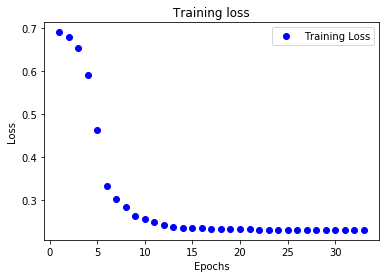

In [ ]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training Loss')
#plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

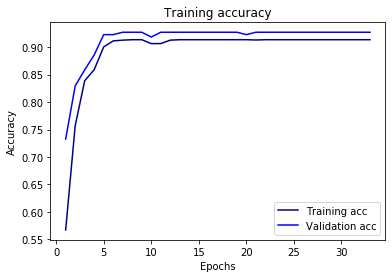

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, color='darkblue', label='Training acc' )
plt.plot(epochs, val_acc, color='blue', label='Validation acc' )
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()


In [ ]:
tempString = 'সরকারি'
Y = [0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0]
tempInput = np.zeros(shape=(1,10))
count = 0
for i in tempString:
  tempInput[0][count]= ord(i) - 2400
  count = count + 1
print(tempInput)
probabilities = model.predict(tempInput)
accuracy = np.mean(probabilities == Y)
prediction = pd.DataFrame(probabilities, columns=['অ','আ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','খ','গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়'])
print(prediction)

[[88. 80. 53. 94. 80. 95.  0.  0.  0.  0.]]
          অ         আ        ই  ...         ড়         ঢ়         য়
0  0.052787  0.542426  0.36216  ...  0.040208  0.001353  0.047819

[1 rows x 46 columns]
